In [1]:
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [3]:
data = np.loadtxt("res/bluegills.txt",delimiter='\t',skiprows=1)

In [5]:
num_points = len(data)

In [6]:
num_points

78

***Stardadize Data***

In [7]:
data = (data-np.mean(data,axis=0))/np.std(data,axis=0)

***Shuffle***

In [8]:
np.random.shuffle(data)

In [21]:
data

array([[ 0.40351793,  0.09997032],
       [-0.68180615, -0.15022277],
       [ 0.40351793,  0.76715189],
       [ 0.40351793,  1.10074267],
       [ 0.40351793,  0.55865765],
       [ 0.40351793,  0.26676571],
       [ 0.40351793,  0.68375419],
       [ 0.40351793,  0.3501634 ],
       [ 0.40351793, -0.15022277],
       [ 0.40351793,  0.60035649],
       [ 1.48884201,  0.26676571],
       [ 2.57416609,  1.10074267],
       [ 0.40351793, -0.15022277],
       [ 1.48884201,  0.26676571],
       [-1.76713024, -1.44288707],
       [ 0.40351793,  1.05904382],
       [-0.68180615,  0.26676571],
       [-0.68180615, -1.06759743],
       [-2.85245432, -3.40273293],
       [-0.68180615, -0.56721126],
       [-0.68180615, -0.90080204],
       [-0.68180615, -0.52551241],
       [ 1.48884201,  0.68375419],
       [-1.76713024, -1.8181767 ],
       [ 0.40351793,  0.68375419],
       [-0.68180615, -0.56721126],
       [-0.68180615, -0.15022277],
       [-1.76713024, -0.85910319],
       [ 0.40351793,

***Split***

In [10]:
train, validation, test = np.split(data, [int(num_points*0.5),int(num_points*0.75)])

***Polyfit***

In [11]:
def mean_square_error(data,coefs):
    """Return mean squared error
	   X on first column, Y on second column
    """
    pred = np.polyval(coefs,data[:,0])
    error = np.mean((data[:,1]-pred)**2)
    return error

In [12]:
best_err = 10000000 # very large number

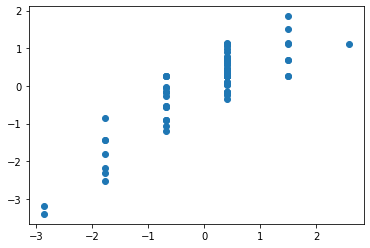

In [13]:
plt.plot(data[:,0], data[:,1],'o')

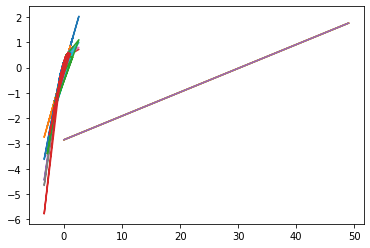

In [25]:
for degree in range(1,6):
    coefs = np.polyfit(train[:,0],train[:,1],degree)
    valid_error = mean_square_error(validation,coefs)
    curve = np.polyval(coefs,train)
    xp = np.linspace(min(data[:,0]), max(data[:,1]), 3)
    plt.plot(train, curve, xp)
    if valid_error < best_err:
        best_err = valid_error
        best_coef = coefs
        best_degree = degree

In [15]:
curve

array([[ 0.48663236,  0.30990185],
       [-0.45775178,  0.10242649],
       [ 0.48663236,  0.57220297],
       [ 0.48663236,  0.53467223],
       [ 0.48663236,  0.54041199],
       [ 0.48663236,  0.41826127],
       [ 0.48663236,  0.56499853],
       [ 0.48663236,  0.46224556],
       [ 0.48663236,  0.10242649],
       [ 0.48663236,  0.55046759],
       [ 0.40576187,  0.41826127],
       [ 1.10074267,  0.53467223],
       [ 0.48663236,  0.10242649],
       [ 0.40576187,  0.41826127],
       [-1.66180602, -1.3161476 ],
       [ 0.48663236,  0.54446188],
       [-0.45775178,  0.41826127],
       [-0.45775178, -0.90002692],
       [-3.40273293, -5.7816431 ],
       [-0.45775178, -0.32852155],
       [-0.45775178, -0.70902565],
       [-0.45775178, -0.28224904],
       [ 0.40576187,  0.56499853],
       [-1.66180602, -1.71650928],
       [ 0.48663236,  0.56499853],
       [-0.45775178, -0.32852155],
       [-0.45775178,  0.10242649],
       [-1.66180602, -0.66104451],
       [ 0.48663236,

In [16]:
train

array([[ 0.40351793,  0.09997032],
       [-0.68180615, -0.15022277],
       [ 0.40351793,  0.76715189],
       [ 0.40351793,  1.10074267],
       [ 0.40351793,  0.55865765],
       [ 0.40351793,  0.26676571],
       [ 0.40351793,  0.68375419],
       [ 0.40351793,  0.3501634 ],
       [ 0.40351793, -0.15022277],
       [ 0.40351793,  0.60035649],
       [ 1.48884201,  0.26676571],
       [ 2.57416609,  1.10074267],
       [ 0.40351793, -0.15022277],
       [ 1.48884201,  0.26676571],
       [-1.76713024, -1.44288707],
       [ 0.40351793,  1.05904382],
       [-0.68180615,  0.26676571],
       [-0.68180615, -1.06759743],
       [-2.85245432, -3.40273293],
       [-0.68180615, -0.56721126],
       [-0.68180615, -0.90080204],
       [-0.68180615, -0.52551241],
       [ 1.48884201,  0.68375419],
       [-1.76713024, -1.8181767 ],
       [ 0.40351793,  0.68375419],
       [-0.68180615, -0.56721126],
       [-0.68180615, -0.15022277],
       [-1.76713024, -0.85910319],
       [ 0.40351793,

In [19]:
plt.show()